# New York City Airbnb Market Analysis

Welcome to this notebook, where we will explore the short-term rental market in New York City by analyzing Airbnb listings data. As a consultant working for a real estate start-up, I've gathered Airbnb data from various sources to help the company gain insights into private room listings. In particular, we'll focus on understanding the prices, room types, and reviews associated with these listings.

## Project Overview

New York City is one of the most-visited cities in the world, attracting millions of travelers each year. The demand for temporary lodging, especially through platforms like Airbnb, is high, ranging from a few nights to several months. This project aims to dive into this bustling market by analyzing data on Airbnb listings.

To conduct this analysis, we will combine data from multiple file types—CSV, Excel, and TSV files—that provide various information about listings, such as pricing, room type, and review dates.

## Key Questions to Address
- What are the dates of the earliest and most recent reviews?
- How many of the listings are private rooms?
- What is the average price of all listings?

Let's dive into the analysis!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data from different file types
airbnb_price = pd.read_csv("Dataset/airbnb_data/airbnb_price.csv")
airbnb_room_type = pd.read_excel("Dataset/airbnb_data/airbnb_room_type.xlsx")
airbnb_last_review = pd.read_csv('Dataset/airbnb_data/airbnb_last_review.tsv', sep='\t')

In [3]:
airbnb_price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [4]:
airbnb_room_type.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [5]:
airbnb_last_review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


So, we've decided to **merge** the three datasets into one for a clearer overall understanding and improved analysis. 

In [6]:
# Make a copy of the datasets before manipulating them
airbnb_price_copy = airbnb_price.copy()
airbnb_room_type_copy = airbnb_room_type.copy()
airbnb_last_review_copy = airbnb_last_review.copy()

In [7]:
#We can merge the three datasets on listing_id
merged_data = airbnb_price_copy.merge(airbnb_room_type_copy, on='listing_id', how='inner') \
                               .merge(airbnb_last_review_copy, on='listing_id', how='inner')

In [8]:
merged_data.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


### 1. Determining the earliest and most recent review dates

In [9]:
merged_data["last_review"].dtypes

dtype('O')

In [10]:
#Convert the 'last_review' column to datetime format
merged_data["last_review"] = pd.to_datetime(merged_data["last_review"], errors='coerce')

In [11]:
merged_data["last_review"].dtypes

dtype('<M8[ns]')

In [12]:
earliest_review = merged_data["last_review"].min()

The earliest reviews date back to January 1, 2019.

In [45]:
most_recent_review = merged_data["last_review"].max()
most_recent_review

Timestamp('2019-07-09 00:00:00')

The most recent reviews date back to July 9, 2019.

### 2.Finding how many listings are private rooms

In [14]:
merged_data

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,2019-05-21
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,2019-07-05
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,2019-06-22
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,2019-06-09
...,...,...,...,...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM,Rusaa,2019-07-07
25205,36427429,45 dollars,"Queens, Flushing",No.2 with queen size bed,PRIVATE ROOM,H Ai,2019-07-07
25206,36438336,235 dollars,"Staten Island, Great Kills",Seas The Moment,Private room,Ben,2019-07-07
25207,36442252,100 dollars,"Bronx, Mott Haven",1B-1B apartment near by Metro,Entire home/apt,Blaine,2019-07-07


In [15]:
# Display all rooms types values
merged_data["room_type"].unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Shared room', 'SHARED ROOM'], dtype=object)

First, we need to clean the data to filter out only private rooms.

In [16]:
#We clean the data 
merged_data["room_type"] = merged_data["room_type"].str.lower().str.capitalize()
#Display the result
merged_data["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [17]:
#Display the total of Private room
privates_rooms_listings = (merged_data["room_type"] == "Private room").sum()

In [18]:
privates_rooms_listings

11356

In [19]:
#Display the total of rooms 
total_rooms_listings = (merged_data["room_type"] == "Private room").value_counts().sum()

In [20]:
total_rooms_listings

25209

We plot a graph to improve visualization.

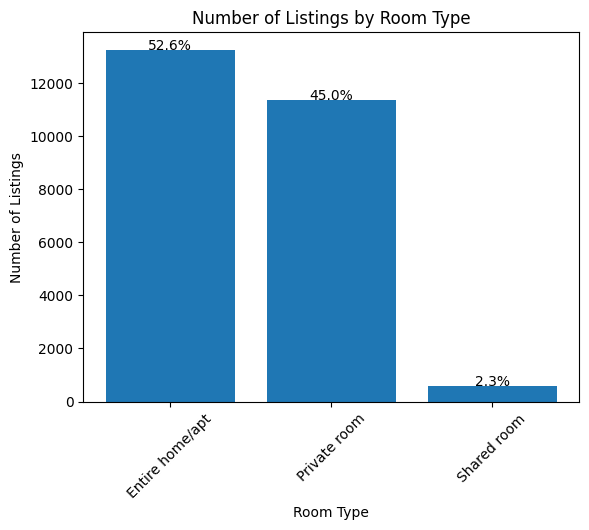

In [21]:
# Count occurrences of each room type
room_type_counts = merged_data["room_type"].value_counts()

# Calculate percentage of each room type
total_listings = room_type_counts.sum()
room_type_percentages = (room_type_counts / total_listings) * 100

# Create the bar plot
plt.bar(room_type_counts.index, room_type_counts.values)

# Add labels and a title in English
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Room Type')

# Display percentages above each bar
for i, value in enumerate(room_type_counts.values):
    percentage = room_type_percentages.iloc[i]
    plt.text(i, value + 5, f'{percentage:.1f}%', ha='center')

# Adjust x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [22]:
print(f"There are {privates_rooms_listings} private rooms in total in the dataset.")

There are 11356 private rooms in total in the dataset.


### 3. Finding the average price of listings

In [24]:
merged_data["price"].unique

<bound method Series.unique of 0        225 dollars
1         89 dollars
2        200 dollars
3         79 dollars
4        150 dollars
            ...     
25204    129 dollars
25205     45 dollars
25206    235 dollars
25207    100 dollars
25208     30 dollars
Name: price, Length: 25209, dtype: object>

You'll need to convert the price data to float values to find their mean.

In [27]:
#Extract numeric part and convert to integer
merged_data["new_price"] = merged_data["price"].str.extract(r'(\d+)').astype(int)

In [32]:
#Delete 
merged_data.drop('price', axis=1, inplace=True)

In [ ]:
#Rename the new row
merged_data.rename(columns={'new_price': 'price'}, inplace=True)

In [33]:
merged_data["price"].unique

<bound method Series.unique of 0        225
1         89
2        200
3         79
4        150
        ... 
25204    129
25205     45
25206    235
25207    100
25208     30
Name: price, Length: 25209, dtype: int64>

Now we have a numeric columns 

In [41]:
# Calculate the mean price rounded to 2 digits
mean_price = round(merged_data["price"].mean(), 2)

In [42]:
print(f"The mean price for a night is {mean_price} $")

The mean price for a night is 141.78 $


4. ### Creating a DataFrame with the four solution values

Combine the insights gathered into one DataFrame called review_dates containing four columns and one row of data, and round the avg_price to two decimal places.

In [47]:
data = {
    'Earliest review':earliest_review,
    'Most recent review':most_recent_review,
    'Privates rooms listings':privates_rooms_listings,
    'Mean price':mean_price,    
}
review_dates = pd.DataFrame(data, index=[0])

In [48]:
review_dates

,Earliest review,Most recent review,Privates rooms listings,Mean price
0,2019-01-01,2019-07-09,11356,141.78
